# Data Analysis
This section is focused mainly on the following points:
- Reading from file
- Plotting into histograms
- Data Sumary
- Outliers detection

The data set file structure must be as follows:
1. number_of_samples
2. number_of_atributes
3. number_of_different_targets_of_class
4. _samples_ (**the samples must be described with all its attributes separated by a single coma and each one in a new line**) 


### Imports Section

In [1]:
# Imports section
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

### Read the file in the format given

In [2]:
# Read the file in the format given
text=""
nLines=0
nAttributes=0
nClasses=0
attributesName = []
data = []
dataPerAttribute = []
classes = []
try:
    with open("archivo.txt","r") as file:
        count=0
        for line in file:
            if count < 3:
                if count == 0:
                    nLines = int(line.strip())
                else:
                    if count == 1:
                        nAttributes = int(line.strip())
                        for i in range(1,nAttributes+1):
                            attributesName.append("att"+str(i))
                            dataPerAttribute.append([])
                    else:
                        if count == 2:
                            nClasses = int(line.strip())
            else:
                split_string_S = line.strip().split(',')
                
                count_split = 0
                split_string_n = []
                for split in split_string_S:
                    if count_split >= nAttributes:
                        split_string_n.append(int(split))
                    else:
                        split_string_n.append(float(split))
                    count_split += 1
                    
                data.append(split_string_n)
                classes.append(split_string_n[nAttributes])
                n_attribute = 0
                for attribute in split_string_n:
                    if n_attribute >= nAttributes:
                        break
                    else:
                        dataPerAttribute[n_attribute].append(attribute)
                        n_attribute += 1
            count += 1
        print("EOF reached")
except FileNotFoundError:
    text="Archivo no existe"
    exit()
finally:
    file.close()
    # print(str(nLines) + "\n")
    # print(str(nAttributes) + "\n")
    # print(str(nClasses) + "\n")
    # print(attributesName)
    # print(data)

EOF reached


### Data Summary

In [3]:
# Data summary
# === Exceptions ===

class StatsError(ValueError):
    pass


# === Helper functions ===

def _getOccurencies(dataPoints):
    listOfTerms = {} # all terms found

    for x in dataPoints:
        if x in listOfTerms:
            listOfTerms[x] += 1
        else:
            listOfTerms[x] = 1
                    
    return listOfTerms    

def _diff_mean(x):
      # given a x data set, return an array with the distance between each
	# data point in x and the mean of the input data set x.
	x_bar = mean(x)
	return [x_i - x_bar for x_i in x]
    
# === Measures of central tendency (averages) ===
     
def mean(dataPoints, precision=3):
    """
    the arithmetic average of given data
    Arguments:
        dataPoints: a list of data points, int or float
        precision (optional): digits precision after the comma, default=3
    Returns:
        float, the mean of the input
        or StatsError if X is empty.
    """
    try:
        return round(sum(dataPoints) / float(len(dataPoints)), precision)
    except ZeroDivisionError:
        raise StatsError('no data points passed')

def median(dataPoints):
    """
    the median of given data
    Arguments:
        dataPoints: a list of data points, int or float
    Returns:
        the middle number in the sorted list, a float or an int
    """
    if not dataPoints:
        raise StatsError('no data points passed')
        
    sortedPoints = sorted(dataPoints)
    mid = len(sortedPoints) // 2  # uses the floor division to have integer returned
    if (len(sortedPoints) % 2 == 0):
        # even
        return (sortedPoints[mid-1] + sortedPoints[mid]) / 2.0
    else:
        # odd
        return sortedPoints[mid]
        
    
def mode(dataPoints):
    '''
    All modes (you can have multiple modes in a data set) of the given data
    Argument:
        dataPoints: a list of data points, int or float
    Returns:
        list, the most common number(s) in the argument list
    '''
    if not dataPoints:
        raise StatsError('no data points passed')
        
    dataAndOcc = _getOccurencies(dataPoints)
    
    maxOccurence = max(dataAndOcc.values())
    return [k for k,v in dataAndOcc.items() if v == maxOccurence]

# === Measures of spread ===
    
def stdDev(X, precision=3):
    """
    standard deviation of the given data (population)
    Argument:
        X: data points, a list of int
        precision (optional): digits precision after the comma, default=3
    Returns:
        float, the standard deviation of the input sample
    """

    tot = 0.0
    meanX = mean(X,10)

    for x in X:
        tot += (x - meanX) ** 2
    return round((tot/len(X))**0.5, precision)
        
def coeffVar(X, precision=3):
    """
    Coefficient of variation of the given data (population)
    Argument:
        X: data points, a list of int, do not mix negative and positive numbers
        precision (optional): digits precision after the comma, default=3
    Returns:
        float, the cv (measure of dispersion) of the input sample
        or raise StatsError('mean is zero') if the mean = 0
    """
    try:
        return round(stdDev(X, precision) / mean(X, precision), precision)
    except ZeroDivisionError:
        raise StatsError('mean is zero')
    
def stdDevOfLengths(L):
    """
    standard deviation of the lengths of given strings
    Argument:
        L: a list of strings
    Returns:
        float, the standard deviation of the lengths of the strings,
        or StatsError if L is empty.
    """
    if not L:
        raise StatsError('no data points passed')
        
    strLen = []
    for i in L:
        strLen.append(len(i))
    
    return stdDev(strLen)
  
# === Measures of range ===
def range(dataPoints):
    if not dataPoints:
        raise StatsError('no data points passed')
        
    return max(dataPoints) - min(dataPoints)

def quartiles(dataPoints):
    """
    the lower and upper quartile
    Arguments:
        dataPoints: a list of data points, int or float
    Returns:
        the first and the last quarter in the sorted list, a tuple of float or int
    """
    if not dataPoints:
        raise StatsError('no data points passed')
        
    sortedPoints = sorted(dataPoints)
    mid = len(sortedPoints) // 2 # uses the floor division to have integer returned
    
    if (len(sortedPoints) % 2 == 0):
        # even
        lowerQ = median(sortedPoints[:mid])
        upperQ = median(sortedPoints[mid:])
    else:
        # odd
        lowerQ = median(sortedPoints[:mid])
        upperQ = median(sortedPoints[mid+1:])
            
    return (lowerQ, upperQ)

# === Summary ===
def summary(dataPoints):
    if not dataPoints:
        raise StatsError('no data points passed')
    q_1,q_3 = quartiles(dataPoints)
    print ("Summary statistics")
    print ("Min      : ", min(dataPoints))
    print ("Lower Qu.: ", q_1)
    print ("Median   : ", median(dataPoints))
    print ("Mean     : ", mean(dataPoints))
    print ("Upper Qu.: ", q_3)
    print ("Max      : ", max(dataPoints))
    return "That's all" # this avoids printing None
def outlierDetection(low,up,dataSet):
    outliers = []
    for data in dataSet:
        if (data < low) or (data > up) :
            outliers.append(data)
    return outliers

### Turning information into histograms and outliers detection


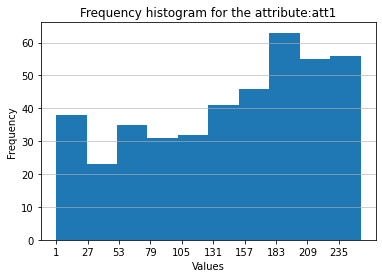

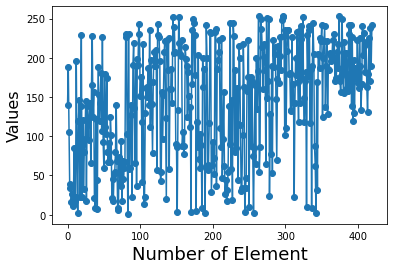

Summary statistics
Min      :  1.0
Lower Qu.:  85.0
Median   :  160.0
Mean     :  144.245
Upper Qu.:  205.0
Max      :  253.0
OutLiers
No outliers


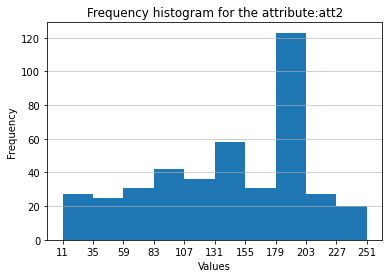

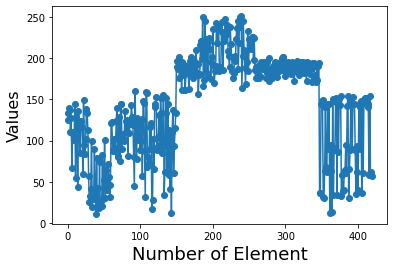

Summary statistics
Min      :  11.0
Lower Qu.:  92.0
Median   :  152.0
Mean     :  142.345
Upper Qu.:  190.0
Max      :  251.0
OutLiers
No outliers


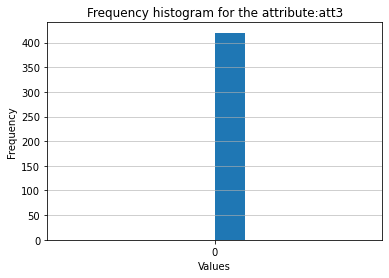

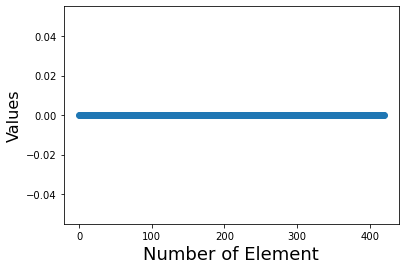

Summary statistics
Min      :  0.0
Lower Qu.:  0.0
Median   :  0.0
Mean     :  0.0
Upper Qu.:  0.0
Max      :  0.0
OutLiers
No outliers


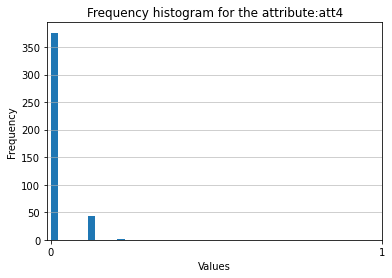

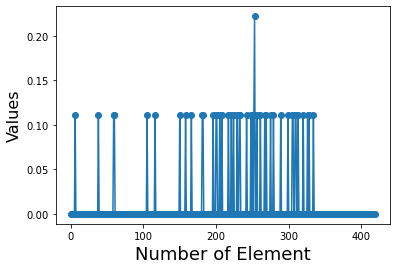

Summary statistics
Min      :  0.0
Lower Qu.:  0.0
Median   :  0.0
Mean     :  0.012
Upper Qu.:  0.0
Max      :  0.22222222
OutLiers
0.11111111
0.11111111
0.11111111
0.11111111
0.11111111
0.11111111
0.11111111
0.11111111
0.11111111
0.11111111
0.11111111
0.11111111
0.11111111
0.11111111
0.11111111
0.11111111
0.11111111
0.11111111
0.11111111
0.11111111
0.11111111
0.11111111
0.11111111
0.11111111
0.11111111
0.11111111
0.22222222
0.11111111
0.11111111
0.11111111
0.11111111
0.11111111
0.11111111
0.11111111
0.11111111
0.11111111
0.11111111
0.11111111
0.11111111
0.11111111
0.11111111
0.11111111
0.11111111
0.11111111


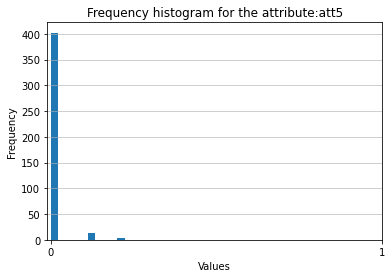

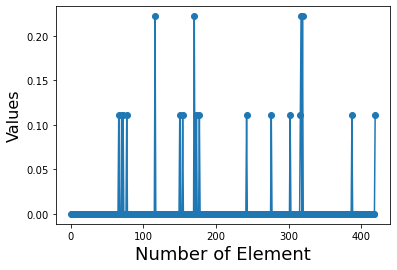

Summary statistics
Min      :  0.0
Lower Qu.:  0.0
Median   :  0.0
Mean     :  0.006
Upper Qu.:  0.0
Max      :  0.22222222
OutLiers
0.11111111
0.11111111
0.11111111
0.11111111
0.22222222
0.11111111
0.11111111
0.22222222
0.11111111
0.11111111
0.11111111
0.11111111
0.11111111
0.11111111
0.22222222
0.22222222
0.11111111
0.11111111


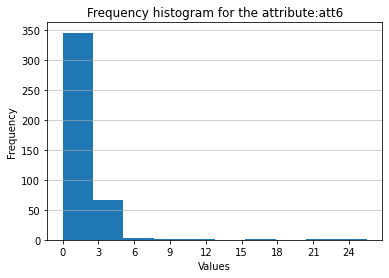

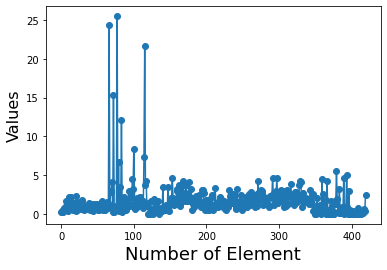

Summary statistics
Min      :  0.0
Lower Qu.:  0.666667345
Median   :  1.33333375
Mean     :  1.757
Upper Qu.:  2.1666667
Max      :  25.5
OutLiers
24.388891
15.388889
25.5
6.722223
12.166667
4.4444447
8.388889
7.38889
21.666666
4.6111107
4.6666665
4.6111107
4.444444
5.5000005
4.6666665
5.0555553


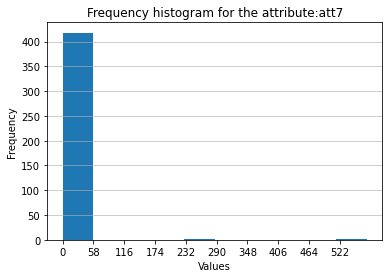

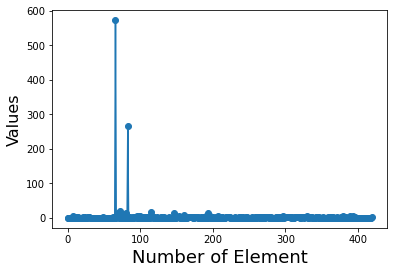

Summary statistics
Min      :  0.0
Lower Qu.:  0.41110288
Median   :  0.92394775
Mean     :  3.465
Upper Qu.:  1.7062605
Max      :  572.9964
OutLiers
5.3518505
3.6740727
572.9964
13.751853
8.740745
19.136257
12.795401
3.7083488
14.962965
267.45554
4.044447
4.385187
4.359749
4.577317
6.9455557
17.3628
4.4493027
3.7618961
13.496301
3.8851852
5.495115
7.6629586
3.8555553
5.722223
15.2629595
6.0888896
6.829628
5.495115
4.38896
5.737789
5.1164227
5.539421


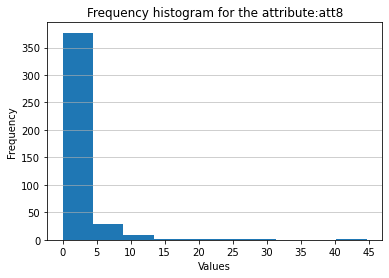

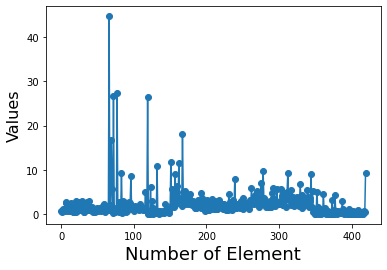

Summary statistics
Min      :  0.0
Lower Qu.:  0.722222185
Median   :  1.5555559
Mean     :  2.358
Upper Qu.:  2.8333330500000002
Max      :  44.722225
OutLiers
44.722225
16.666666
26.611113
27.277779
9.222222
8.555555
26.444445
6.1666665
10.777778
11.722221
8.999999
6.2222214
11.5
18.166666
8.0
7.0
9.777778
9.166667
6.6666656
9.0
9.277778


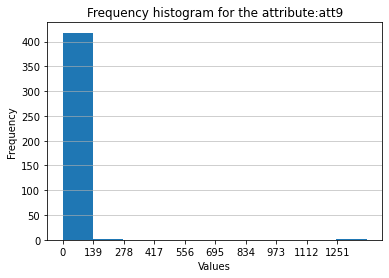

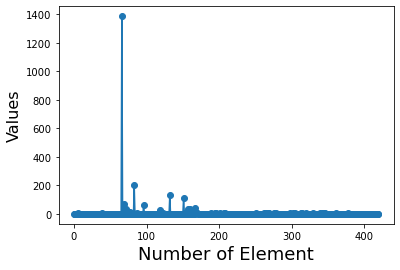

Summary statistics
Min      :  0.0
Lower Qu.:  0.42962983
Median   :  1.06805475
Mean     :  6.539
Upper Qu.:  1.9706131
Max      :  1386.3292
OutLiers
5.051852
1386.3292
71.5111
28.50741
31.71359
15.930981
6.4333353
205.36296
59.54075
25.537477
4.7034264
131.80739
114.59634
5.795274
31.022234
32.118523
18.922234
41.988934
9.218522
6.0888896
4.6074066
7.599998
5.007407
5.556445
5.6489916
5.455545
5.795274
6.071487
5.8566217
7.360555
6.749488


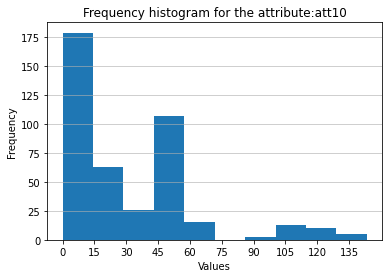

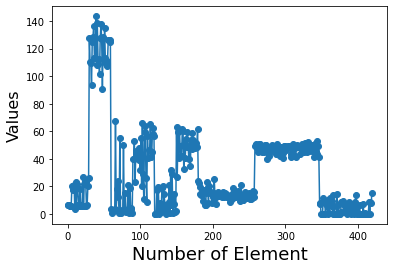

Summary statistics
Min      :  0.0
Lower Qu.:  7.0185185
Median   :  18.0185185
Mean     :  30.833
Upper Qu.:  48.351850999999996
Max      :  143.44444
OutLiers
128.0
110.59259
125.0
128.44444
136.2963
113.48148
113.37037
143.44444
138.62962
112.111115
127.62963
138.07408
126.77778
128.48148
111.62963
134.92592
113.25926
110.703705
125.96296
126.0
126.22222
124.55556


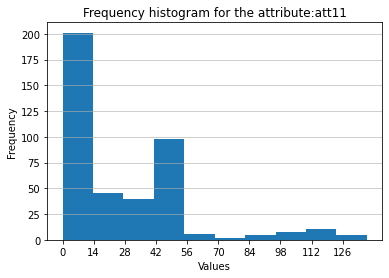

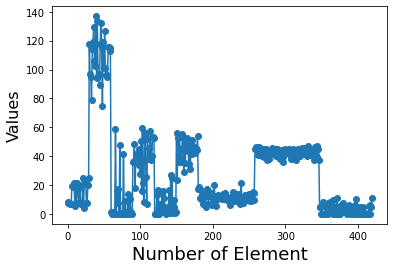

Summary statistics
Min      :  0.0
Lower Qu.:  6.111111
Median   :  15.222221999999999
Mean     :  27.336
Upper Qu.:  43.833335000000005
Max      :  136.88889
OutLiers
117.77778
114.0
119.22222
129.77779
105.888885
102.55556
136.88889
133.33334
117.666664
132.55556
115.77778
119.0
101.0
126.44444
100.77778
115.55556
115.888885
115.111115
112.77778


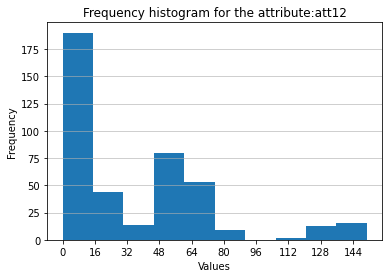

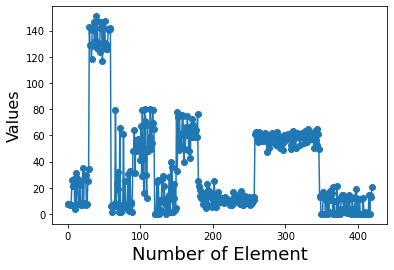

Summary statistics
Min      :  0.0
Lower Qu.:  8.611111000000001
Median   :  21.2777775
Mean     :  36.673
Upper Qu.:  59.22222
Max      :  150.88889
OutLiers
142.33334
140.55556
142.88889
146.33334
150.88889
147.55556
141.66667
146.55556
141.88889
142.77777
147.22223
140.88889
140.66667
142.22223
141.0


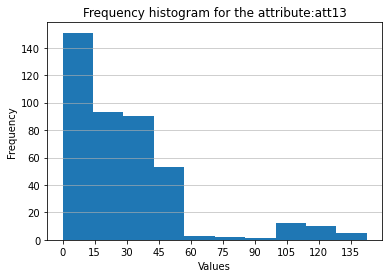

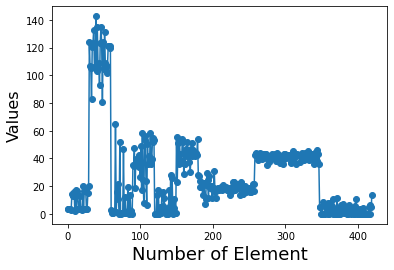

Summary statistics
Min      :  0.0
Lower Qu.:  4.61111115
Median   :  19.222221
Mean     :  28.49
Upper Qu.:  41.944445
Max      :  142.55556
OutLiers
123.888885
106.333336
105.111115
120.44444
123.22222
132.77779
106.0
105.55556
142.55556
102.77778
135.0
104.888885
108.666664
123.55556
135.11111
122.666664
123.666664
104.666664
131.11111
108.888885
103.77778
101.888885
106.888885
121.44444
121.44444
121.333336
119.888885


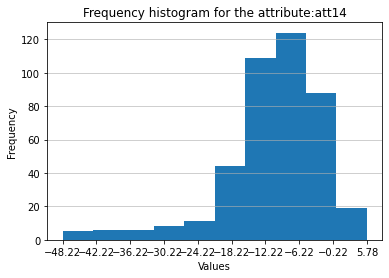

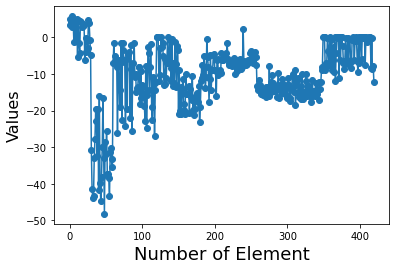

Summary statistics
Min      :  -48.22222
Lower Qu.:  -14.7222225
Median   :  -9.0
Mean     :  -10.491
Upper Qu.:  -4.888889
Max      :  5.7777777
OutLiers
-30.666666
-41.444443
-43.77778
-43.22222
-33.0
-32.444443
-41.555557
-39.77778
-44.666668
-38.22222
-29.88889
-33.0
-48.22222
-31.88889
-37.444443
-37.333332
-38.333332
-43.444443
-31.222221
-30.333334
-33.333332
-35.333332


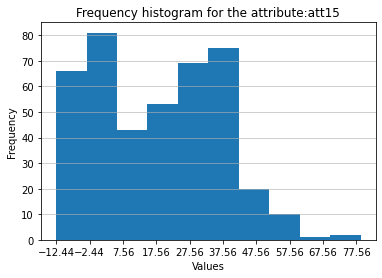

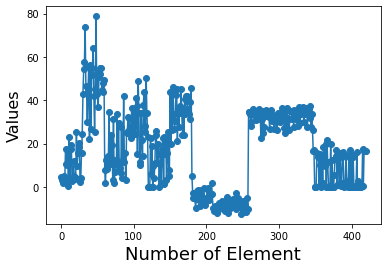

Summary statistics
Min      :  -12.444445
Lower Qu.:  0.22222222
Median   :  16.6111105
Mean     :  17.519
Upper Qu.:  33.555557
Max      :  78.77778
OutLiers
No outliers


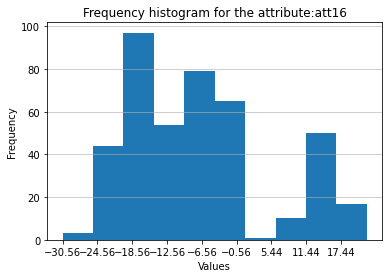

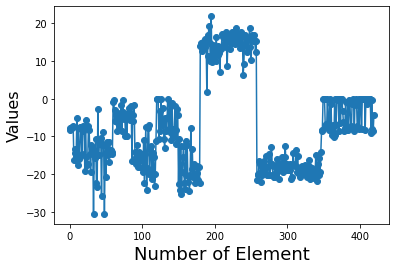

Summary statistics
Min      :  -30.555555
Lower Qu.:  -17.555555
Median   :  -8.555555
Mean     :  -7.028
Upper Qu.:  -0.11111111
Max      :  21.88889
OutLiers
No outliers


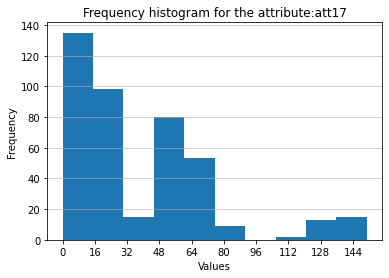

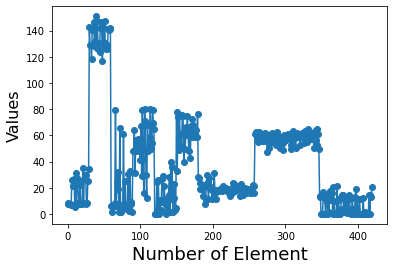

Summary statistics
Min      :  0.0
Lower Qu.:  11.444445
Median   :  23.611112
Mean     :  38.026
Upper Qu.:  59.22222
Max      :  150.88889
OutLiers
142.33334
140.55556
142.88889
146.33334
132.0
150.88889
147.55556
141.66667
146.55556
141.88889
142.77777
147.22223
140.88889
140.66667
142.22223
141.0


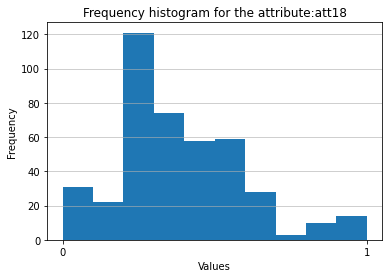

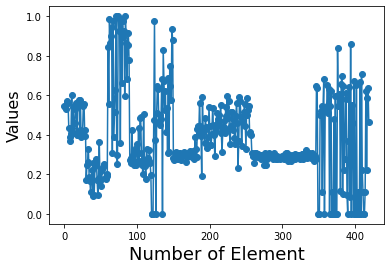

Summary statistics
Min      :  0.0
Lower Qu.:  0.27874581499999995
Median   :  0.31291914
Mean     :  0.386
Upper Qu.:  0.514815785
Max      :  1.0
OutLiers
0.9861111
0.89973545
0.94481075
0.97376543
1.0
1.0
0.9261464
0.9876543
0.9861111
0.9777778
0.895369
0.9238095
1.0
0.915376
0.9777778
0.93333334
0.88148147


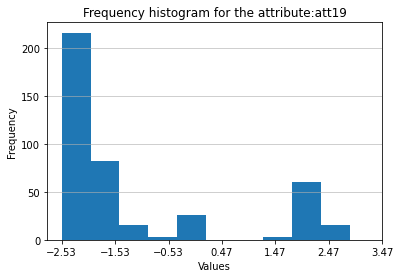

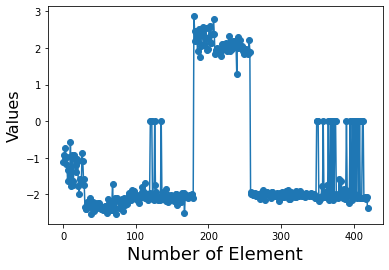

Summary statistics
Min      :  -2.5309503
Lower Qu.:  -2.0943952
Median   :  -1.9959218
Mean     :  -1.12
Upper Qu.:  -0.65760582
Max      :  2.8649306
OutLiers
2.8649306
2.4538307
2.1891353
2.4475467
2.3172119
1.9053026
2.1929355
2.5158255
2.332739
1.7566451
2.0465877
2.0758736
2.5610487
2.413262
2.0931497
2.3041532
2.5549645
2.2421958
1.9430399
1.9829868
2.2671974
2.545329
2.6040132
2.1286457
2.1224225
2.3683105
2.3826835
2.7898002
2.3924873
1.8388497
1.9108642
1.9414649
1.9879022
1.875362
1.8636538
1.8771459
1.8601909
1.7835119
1.9504046
2.0999045
2.0438652
2.0992203
2.019747
1.9855517
2.1260629
2.0066419
1.9092555
1.9378915
2.332243
1.9164191
1.9867483
2.164262
1.9665359
1.9903806
2.1980507
2.038483
2.0861003
2.1929355
2.0466826
2.291118
1.9847853
2.0694523
2.0437257
2.2046695
1.9931829
2.0609548
2.011228
1.9036856
1.8388497
1.9109454
1.8704867
1.9744948
1.9408315
1.872506
1.8223403
2.2212758
1.8910155


In [6]:
 # Turning information into histograms
i = 0
for attributeData in dataPerAttribute:
    n = len(dataPerAttribute[i])
    k = math.ceil(1+3.32*math.log2(n))
    k = min(k,10)
    rangeData = max(dataPerAttribute[i])-min(dataPerAttribute[i])
    binsWidth = rangeData / k
    binsWidth = math.ceil(binsWidth)
    if  binsWidth == 0.0:
        binsWidth = 1.0
    
    plt.hist(dataPerAttribute[i], bins=k,align='mid')
    plt.grid(axis='y', alpha=0.75)
    plt.ylabel('Frequency')
    plt.xlabel('Values')
    plt.xticks(np.arange(min(dataPerAttribute[i]), max(dataPerAttribute[i])+1, binsWidth))
    plt.title('Frequency histogram for the attribute:' + attributesName[i])
    plt.show()
    plt.plot(dataPerAttribute[i],"-o")
    plt.xlabel('Number of Element', fontsize=18)
    plt.ylabel('Values', fontsize=16)
    plt.show()

    summary(dataPerAttribute[i])
    q1,q3 = quartiles(dataPerAttribute[i])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr)
    outLiers = outlierDetection(lower_bound,upper_bound,dataPerAttribute[i])
    print("OutLiers")
    if len(outLiers) == 0:
        print("No outliers")
    else:
        for outLier in outLiers:
            print(outLier)
    i += 1